In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from IPython.display import clear_output
import re
from simpledbf import Dbf5

dbf = Dbf5("Crashes_in_DC.dbf")
df = dbf.to_dataframe()
df

,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGI,ROADWAYSEG,FROMDATE,...,NEARESTINT,NEARESTI_1,OFFINTERSE,INTAPPROAC,LOCATIONER,LASTUPDATE,MPDLATITUD,MPDLONGITU,MPDGEOX,MPDGEOY
0,96413468,26609229,09173516,2009-12-05T05:00:00.000Z,13064152,533.400,0.000000,8130.0,14586.0,2009-12-05T05:00:00.000Z,...,13000502,5TH ST SE,22.663553,Northwest,NaN,NaN,NaN,NaN,NaN,NaN
1,96413469,24512078,13040796,2013-03-30T05:00:00.000Z,13001702,37.766,0.000011,9420.0,20408.0,2013-03-30T04:00:00.000Z,...,13059602,MASSACHUSETTS AVE SE,0.850553,North,NaN,NaN,NaN,NaN,NaN,NaN
2,96413470,25036368,14093178,2014-06-26T05:00:00.000Z,47085772,29.870,0.000000,-9.0,34372.0,2014-06-26T04:00:00.000Z,...,11001502,15TH ST NW,36.641899,West,NaN,NaN,38.900506,-77.033988,NaN,NaN
3,96413471,27133521,16198580,2016-11-22T13:31:23.000Z,47035472,160.325,0.000000,-9.0,26021.0,2016-11-22T05:00:00.000Z,...,12029642,DIVISION AVE NE,26.893516,West,NaN,NaN,38.890167,-76.928204,406228.710000,135816.200000
4,96413472,26609235,09173878,2009-12-06T05:00:00.000Z,58010042,50.597,0.000000,-9.0,32341.0,2009-12-06T05:00:00.000Z,...,11001402,14TH ST NW,36.089659,West,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208717,96621185,28014967,19065970,2019-04-19T00:38:04.000Z,11086122,9.875,9.107313,4236.0,19424.0,2019-04-18T04:00:00.000Z,...,11025152,CONNECTICUT AVE NW,13.407400,West,NaN,NaN,38.940886,-77.061763,NaN,NaN
208718,96621186,28015679,19065648,2019-04-19T13:18:06.000Z,11001602,16.787,0.668425,4201.0,1325.0,2019-04-18T04:00:00.000Z,...,11066042,OAK ST NW,16.837080,North,NaN,NaN,38.935118,-77.03645899999999,NaN,NaN
208719,96621187,28021117,19069880,2019-04-25T02:12:57.000Z,15048473,328.810,32.788480,14747.0,4632.0,2019-03-13T04:00:00.000Z,...,15048461,INTERSTATE 395 BN,2026.991303,East,NaN,NaN,38.900212,-77.009089,399605.98,134742.78
208720,96621188,28014977,19065872,2019-04-19T00:48:49.000Z,11032432,67.661,21.399972,11117.0,9969.0,2019-04-18T04:00:00.000Z,...,11003602,36TH ST NW,254.833738,East,NaN,NaN,38.926986,-77.07114399999999,394047.44,139670.64


In [250]:
df['REPORTDATE'] = df['REPORTDATE'].str.extract(r'(^2019.*)')
df['FROMDATE'] = df['FROMDATE'].str.extract(r'(^2019.*)')
df

,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGI,ROADWAYSEG,FROMDATE,...,NEARESTINT,NEARESTI_1,OFFINTERSE,INTAPPROAC,LOCATIONER,LASTUPDATE,MPDLATITUD,MPDLONGITU,MPDGEOX,MPDGEOY
0,96413468,26609229,09173516,NaN,13064152,533.400,0.000000,8130.0,14586.0,NaN,...,13000502,5TH ST SE,22.663553,Northwest,NaN,NaN,NaN,NaN,NaN,NaN
1,96413469,24512078,13040796,NaN,13001702,37.766,0.000011,9420.0,20408.0,NaN,...,13059602,MASSACHUSETTS AVE SE,0.850553,North,NaN,NaN,NaN,NaN,NaN,NaN
2,96413470,25036368,14093178,NaN,47085772,29.870,0.000000,-9.0,34372.0,NaN,...,11001502,15TH ST NW,36.641899,West,NaN,NaN,38.900506,-77.033988,NaN,NaN
3,96413471,27133521,16198580,NaN,47035472,160.325,0.000000,-9.0,26021.0,NaN,...,12029642,DIVISION AVE NE,26.893516,West,NaN,NaN,38.890167,-76.928204,406228.710000,135816.200000
4,96413472,26609235,09173878,NaN,58010042,50.597,0.000000,-9.0,32341.0,NaN,...,11001402,14TH ST NW,36.089659,West,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208717,96621185,28014967,19065970,2019-04-19T00:38:04.000Z,11086122,9.875,9.107313,4236.0,19424.0,2019-04-18T04:00:00.000Z,...,11025152,CONNECTICUT AVE NW,13.407400,West,NaN,NaN,38.940886,-77.061763,NaN,NaN
208718,96621186,28015679,19065648,2019-04-19T13:18:06.000Z,11001602,16.787,0.668425,4201.0,1325.0,2019-04-18T04:00:00.000Z,...,11066042,OAK ST NW,16.837080,North,NaN,NaN,38.935118,-77.03645899999999,NaN,NaN
208719,96621187,28021117,19069880,2019-04-25T02:12:57.000Z,15048473,328.810,32.788480,14747.0,4632.0,2019-03-13T04:00:00.000Z,...,15048461,INTERSTATE 395 BN,2026.991303,East,NaN,NaN,38.900212,-77.009089,399605.98,134742.78
208720,96621188,28014977,19065872,2019-04-19T00:48:49.000Z,11032432,67.661,21.399972,11117.0,9969.0,2019-04-18T04:00:00.000Z,...,11003602,36TH ST NW,254.833738,East,NaN,NaN,38.926986,-77.07114399999999,394047.44,139670.64


In [251]:
all_data = ["REPORTDATE", "ROUTEID", "STREETSEGI", "ROADWAYSEG", "ADDRESS", "INTAPPROAC", "MAJORINJUR", "MINORINJUR", "UNKNOWNINJ", "FATAL_BICY", "MAJORINJ_1", "MINORINJ_1", "UNKNOWNI_1", "FATAL_DRIV", "MAJORINJ_2", "MINORINJ_2", "UNKNOWNI_2", "FATAL_PEDE", "TOTAL_VEHI", "TOTAL_BICY", "TOTAL_PEDE", "PEDESTRIAN", "BICYCLISTS", "DRIVERSIMP", "TOTAL_TAXI", "TOTAL_GOVE", "SPEEDING_I"]
info = ["REPORTDATE", "ROUTEID", "STREETSEGI", "ROADWAYSEG", "ADDRESS", "INTAPPROAC"]
injur = ["MAJORINJUR", "MINORINJUR", "UNKNOWNINJ", "FATAL_BICY", "MAJORINJ_1", "MINORINJ_1", "UNKNOWNI_1", "FATAL_DRIV", "MAJORINJ_2", "MINORINJ_2", "UNKNOWNI_2", "FATAL_PEDE", "TOTAL_VEHI", "TOTAL_BICY", "TOTAL_PEDE", "PEDESTRIAN", "BICYCLISTS", "DRIVERSIMP", "TOTAL_TAXI", "TOTAL_GOVE", "SPEEDING_I"]
kmean = ["STREETSEGI", "ROADWAYSEG"]
df_info = df.dropna(subset=all_data)
df_injur = df.dropna(subset=injur)

In [252]:
show_data = df_info[all_data].copy()
show_data

,REPORTDATE,ROUTEID,STREETSEGI,ROADWAYSEG,ADDRESS,INTAPPROAC,MAJORINJUR,MINORINJUR,UNKNOWNINJ,FATAL_BICY,...,FATAL_PEDE,TOTAL_VEHI,TOTAL_BICY,TOTAL_PEDE,PEDESTRIAN,BICYCLISTS,DRIVERSIMP,TOTAL_TAXI,TOTAL_GOVE,SPEEDING_I
1059,2019-04-18T15:00:46.000Z,12061552,8182.0,8164.0,1700 MONTANA AVENUE NE,Southeast,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1060,2019-04-25T01:34:35.000Z,47085012,-9.0,33190.0,600 MASSACHUSETTS AVENUE NW,West,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1061,2019-04-29T00:35:42.000Z,13081512,6013.0,6490.0,1006 SOUTHERN AVENUE SE,Northeast,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1063,2019-04-18T15:41:25.000Z,11053492,7876.0,8741.0,801 MT VERNON PLACE NW,East,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1064,2019-04-22T17:46:31.000Z,12060252,9096.0,9620.0,4905 MEADE STREET NE,East,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,2019-04-21T02:09:15.000Z,12084892,2715.0,1853.0,TAYLOR STREET NE & 12TH STREET NE,North,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208717,2019-04-19T00:38:04.000Z,11086122,4236.0,19424.0,CONNECTICUT AVENUE NW & TILDEN ST NW,West,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208718,2019-04-19T13:18:06.000Z,11001602,4201.0,1325.0,16TH STREET & OAK ST NW,North,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208719,2019-04-25T02:12:57.000Z,15048473,14747.0,4632.0,H STREET NE,East,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0


In [253]:
info_data = df_info[info].copy()
info_data

,REPORTDATE,ROUTEID,STREETSEGI,ROADWAYSEG,ADDRESS,INTAPPROAC
1059,2019-04-18T15:00:46.000Z,12061552,8182.0,8164.0,1700 MONTANA AVENUE NE,Southeast
1060,2019-04-25T01:34:35.000Z,47085012,-9.0,33190.0,600 MASSACHUSETTS AVENUE NW,West
1061,2019-04-29T00:35:42.000Z,13081512,6013.0,6490.0,1006 SOUTHERN AVENUE SE,Northeast
1063,2019-04-18T15:41:25.000Z,11053492,7876.0,8741.0,801 MT VERNON PLACE NW,East
1064,2019-04-22T17:46:31.000Z,12060252,9096.0,9620.0,4905 MEADE STREET NE,East
...,...,...,...,...,...,...
208716,2019-04-21T02:09:15.000Z,12084892,2715.0,1853.0,TAYLOR STREET NE & 12TH STREET NE,North
208717,2019-04-19T00:38:04.000Z,11086122,4236.0,19424.0,CONNECTICUT AVENUE NW & TILDEN ST NW,West
208718,2019-04-19T13:18:06.000Z,11001602,4201.0,1325.0,16TH STREET & OAK ST NW,North
208719,2019-04-25T02:12:57.000Z,15048473,14747.0,4632.0,H STREET NE,East


In [254]:
injur_data = df_info[injur].copy()
injur_data

,MAJORINJUR,MINORINJUR,UNKNOWNINJ,FATAL_BICY,MAJORINJ_1,MINORINJ_1,UNKNOWNI_1,FATAL_DRIV,MAJORINJ_2,MINORINJ_2,...,FATAL_PEDE,TOTAL_VEHI,TOTAL_BICY,TOTAL_PEDE,PEDESTRIAN,BICYCLISTS,DRIVERSIMP,TOTAL_TAXI,TOTAL_GOVE,SPEEDING_I
1059,0,0,0,0,0,2,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1060,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1061,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1063,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208717,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208718,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
208719,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0


In [255]:
injur_data = injur_data.sum()
injur_data

MAJORINJUR       16
MINORINJUR      140
UNKNOWNINJ        1
FATAL_BICY        1
MAJORINJ_1       80
MINORINJ_1     1617
UNKNOWNI_1     1021
FATAL_DRIV        4
MAJORINJ_2       40
MINORINJ_2      265
UNKNOWNI_2       15
FATAL_PEDE        3
TOTAL_VEHI    18866
TOTAL_BICY      213
TOTAL_PEDE      391
PEDESTRIAN       14
BICYCLISTS        0
DRIVERSIMP        0
TOTAL_TAXI      397
TOTAL_GOVE     1214
SPEEDING_I       63
dtype: int64

In [256]:
info_data.describe()

,STREETSEGI,ROADWAYSEG
count,9752.000000,9752.000000
mean,5301.336239,16316.133306
std,4789.361345,11640.465962
min,-9.000000,0.000000
25%,-9.000000,6538.000000
50%,4831.000000,13457.000000
75%,9468.000000,26153.000000
max,15823.000000,40623.000000


In [257]:
info_data.mode()

,REPORTDATE,ROUTEID,STREETSEGI,ROADWAYSEG,ADDRESS,INTAPPROAC
0,2019-01-15T16:04:20.000Z,12064672,-9.0,0.0,INTERSTATE 395 INTERSTATE BN,North
1,2019-03-26T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN
2,2019-05-16T15:54:49.000Z,NaN,NaN,NaN,NaN,NaN
3,2019-05-22T00:29:35.000Z,NaN,NaN,NaN,NaN,NaN


In [258]:
injur_data.describe()

count       21.000000
mean      1160.047619
std       4082.005138
min          0.000000
25%          4.000000
50%         63.000000
75%        391.000000
max      18866.000000
dtype: float64

In [259]:
injur_data.mode()

0    0
1    1
dtype: int64

In [260]:
kdata = df_info[kmean].copy()
kdata

,STREETSEGI,ROADWAYSEG
1059,8182.0,8164.0
1060,-9.0,33190.0
1061,6013.0,6490.0
1063,7876.0,8741.0
1064,9096.0,9620.0
...,...,...
208716,2715.0,1853.0
208717,4236.0,19424.0
208718,4201.0,1325.0
208719,14747.0,4632.0


In [261]:
def random_centroids(data, k):
    centroids=[]
    for i in range(k):
        centroid =data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [262]:
centroids = random_centroids(kdata,2)
print(centroids)

                  0        1
STREETSEGI   9387.0   4592.0
ROADWAYSEG  34286.0  21252.0


In [263]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [264]:
labels = get_labels(kdata,centroids)
labels.value_counts()

1    8171
0    1581
dtype: int64

In [265]:
def new_cenroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [266]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteraion{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:1])
    plt.show()

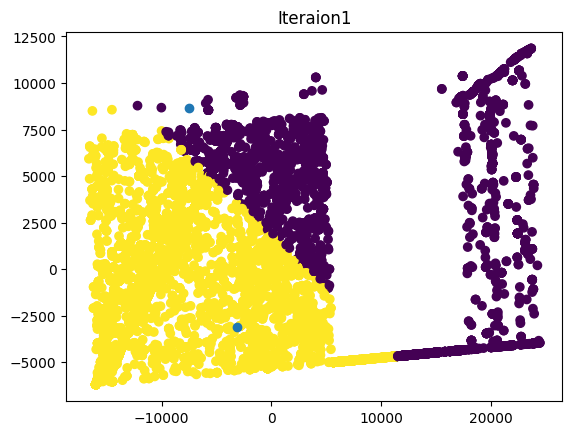

In [267]:
max_iterations = 100
k = 2

centroids = random_centroids(kdata, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(kdata, centroids)
    plot_clusters(kdata, labels, centroids, iteration)
    iteration += 1

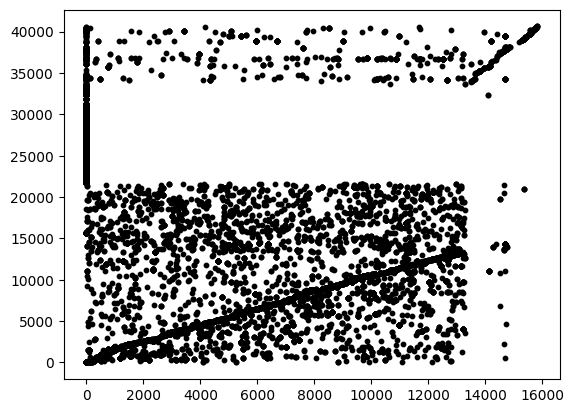

In [268]:
x = kdata.iloc[:, [0, 1]].values
plt.scatter(x[:, 0], x[:, 1], s=10, c="black")

In [269]:
db = DBSCAN(eps = 0.1, min_samples = 10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [270]:
labels

array([-1,  0,  1, ..., -1, -1, -1], dtype=int64)

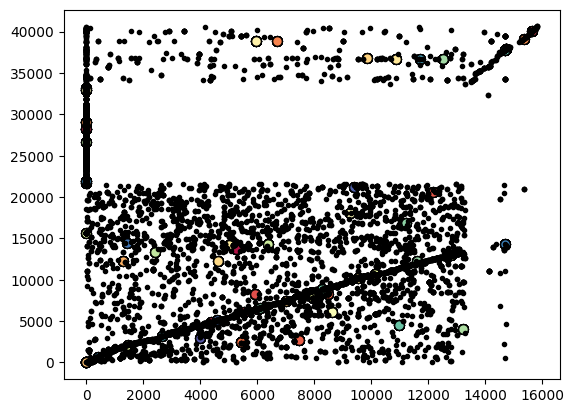

In [271]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=7,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.show()